In [1]:
import pandas as pd

dataset = pd.read_csv('allUsers.lcl.csv')
dataset = dataset.drop(0)
print(dataset.head())

   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2 ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
1 -72.780545  36.621229  81.680557 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
5 -53.475747  76.986143  42.426849 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]


In [2]:
print(dataset.describe())

              Class          User            X0            Y0            Z0  \
count  78095.000000  78095.000000  78095.000000  78095.000000  78095.000000   
mean       2.983776      7.959229     50.346308     85.813150    -29.985096   
std        1.421152      4.697754     32.695886     40.203448     34.361971   
min        1.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295141     63.497746    -56.356593   
50%        3.000000      9.000000     54.620245     86.526334    -30.864248   
75%        4.000000     12.000000     72.488833    113.108673     -1.419462   
max        5.000000     14.000000    190.017835    169.175464    113.345119   

                 X1            Y1            Z1            X2            Y2  \
count  78095.000000  78095.000000  78095.000000  78095.000000  78095.000000   
mean      49.595844     86.193751    -29.509579     48.612744     83.772387   
std       32.477961     40.452297     34.764460    

## Build Skeleton approach

In [3]:
parents = {}
keys = ['X', 'Y', 'Z']

for k in keys:
    for i in range(1, 12):
        parents[str(k) + str(i)] = str(k) + str(i-1)

In [4]:
print(parents)

{'X1': 'X0', 'X2': 'X1', 'X3': 'X2', 'X4': 'X3', 'X5': 'X4', 'X6': 'X5', 'X7': 'X6', 'X8': 'X7', 'X9': 'X8', 'X10': 'X9', 'X11': 'X10', 'Y1': 'Y0', 'Y2': 'Y1', 'Y3': 'Y2', 'Y4': 'Y3', 'Y5': 'Y4', 'Y6': 'Y5', 'Y7': 'Y6', 'Y8': 'Y7', 'Y9': 'Y8', 'Y10': 'Y9', 'Y11': 'Y10', 'Z1': 'Z0', 'Z2': 'Z1', 'Z3': 'Z2', 'Z4': 'Z3', 'Z5': 'Z4', 'Z6': 'Z5', 'Z7': 'Z6', 'Z8': 'Z7', 'Z9': 'Z8', 'Z10': 'Z9', 'Z11': 'Z10'}


In [5]:
linhas, cols = dataset.shape
colnames = dataset.columns
new_dataset = dataset
print(dataset.isin(['?']).sum())
print(linhas, cols)
print('Started')
for linha in range(0, linhas):
    for col in range(2, cols):
        if(new_dataset.iloc[linha, col] == '?'):
            new_dataset.at[linha+1, colnames[col]] = new_dataset.loc[linha+1, parents[colnames[col-3]]]
print(linha, col)
print('Finished')

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64
78095 38
Started
78094 37
Finished


In [6]:
#print(new_dataset.describe())

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64


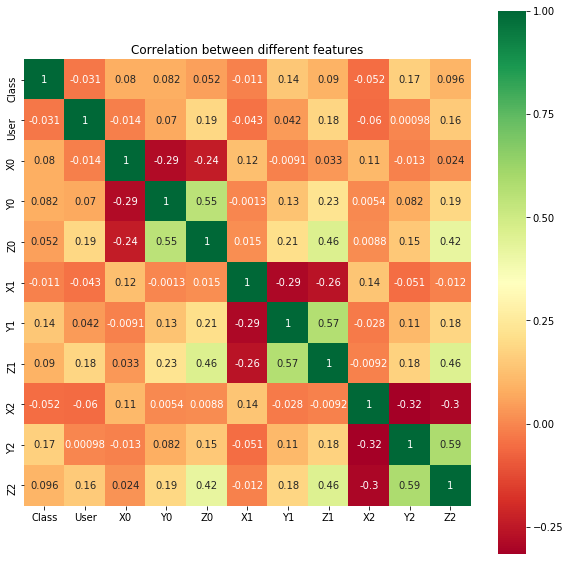

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print(new_dataset.isin(['?']).sum())
correlation = new_dataset.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn',xticklabels=True,yticklabels=True)

# g.set_yticklabels(g.get_yticklabels(), rotation =0)
# g.set_xticklabels(g.get_yticklabels(), size=7, rotation =90)
plt.title('Correlation between different features')
plt.show()

## Plot data

405


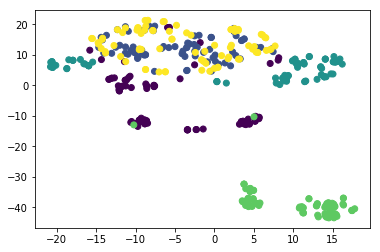

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.manifold import TSNE

dados = new_dataset.sort_values('Class')

dados_print = []
classes = []
atual = 1
cont = 0
shape = dados.shape
AMOSTRA = 80
for i in range(1, shape[0]):
    if cont <= AMOSTRA and atual == dados.loc[i, 'Class']:
        dados_print.append(dados.iloc[i, :])
        classes.append(dados.loc[i, 'Class'])
        cont+=1
    elif cont > AMOSTRA:
        cont = 0
        atual += 1 % 6
print(len(dados_print))
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(dados_print)
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=np.array(classes))
plt.show()

In [8]:
X = new_dataset.iloc[:, 1:]
y = new_dataset.iloc[:, 0]

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)


In [11]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.929574732268


In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.preprocessing import Normalizer, MaxAbsScaler 

pca = PCA(n_components=2)
scaler = MaxAbsScaler()
svd = TruncatedSVD(n_components=30)
model = KMeans(n_clusters=5)

pipeline = make_pipeline(scaler, svd, model)
pipeline.fit_transform(X_train)
labels = pipeline.predict(X_train)
df = pd.DataFrame({'labels': labels, 'classes': y_train})
ct = pd.crosstab(df['labels'], df['classes'])
print(ct)

classes     1     2     3     4     5
labels                               
0         208  5113   901  1229  2781
1        3735    32  3771  3006   262
2         527  4302  1539  1814  2623
3        4424    46  3174  1752   360
4        1987   525  1647  2050  4515


In [60]:
print(pipeline.score(X_test, y_test))

-37301.1821265


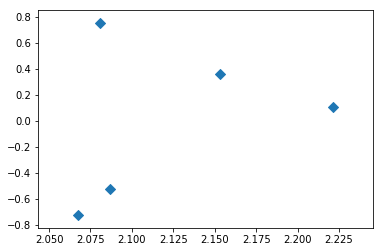

In [62]:
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()